# Khảo Sát Dữ Liệu - Plant Disease Datasets
## Phân tích 4 tập dữ liệu về bệnh cây trồng

Notebook này thực hiện khảo sát chi tiết cho 4 datasets:
1. **PaddyDoctor** - Bệnh trên lúa
2. **PlantDoc** - Object Detection cho bệnh cây trồng
3. **PlantVillage** - Bệnh trên nhiều loại cây trồng
4. **Plantwild** - Dữ liệu mở rộng về bệnh cây trồng

## 1. Import các thư viện cần thiết

In [23]:
# Data processing
import pandas as pd
import numpy as np
import json
import os
from pathlib import Path
from collections import Counter

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Image processing
from PIL import Image
import cv2

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print(" Đã import các thư viện thành công!")

 Đã import các thư viện thành công!


## 2. Thiết lập đường dẫn tới datasets

In [24]:
# Base path
BASE_PATH = Path(r'g:\Dataset\Data')

# Dataset paths
PADDY_DOCTOR_PATH = BASE_PATH / 'PaddyDoctor'
PLANT_DOC_PATH = BASE_PATH / 'PlantDoc' / 'PlantDoc-Object-Detection-Dataset-master'
PLANT_VILLAGE_PATH = BASE_PATH / 'PlantVIllage' / 'PlantVillage-Dataset-master'
PLANT_WILD_PATH = BASE_PATH / 'Plantwild'

print(" Đường dẫn datasets:")
print(f"- PaddyDoctor: {PADDY_DOCTOR_PATH.exists()}")
print(f"- PlantDoc: {PLANT_DOC_PATH.exists()}")
print(f"- PlantVillage: {PLANT_VILLAGE_PATH.exists()}")
print(f"- Plantwild: {PLANT_WILD_PATH.exists()}")

 Đường dẫn datasets:
- PaddyDoctor: True
- PlantDoc: True
- PlantVillage: True
- Plantwild: True


---
# Dataset 1: PaddyDoctor - Bệnh trên lúa

Dataset này chứa hình ảnh các bệnh khác nhau trên cây lúa (paddy/rice).

## 2.1. Load và khảo sát dữ liệu PaddyDoctor

In [25]:
# Load training data
paddy_train_df = pd.read_csv(PADDY_DOCTOR_PATH / 'train.csv')

print(" Thông tin dataset PaddyDoctor:")
print(f"- Tổng số mẫu: {len(paddy_train_df)}")
print(f"- Số cột: {paddy_train_df.shape[1]}")
print(f"\n Các cột:")
print(paddy_train_df.columns.tolist())
print(f"\n Xem 5 dòng đầu:")
paddy_train_df.head(10)

 Thông tin dataset PaddyDoctor:
- Tổng số mẫu: 10407
- Số cột: 4

 Các cột:
['image_id', 'label', 'variety', 'age']

 Xem 5 dòng đầu:


image_id                  label variety  age
0  100330.jpg  bacterial_leaf_blight   ADT45   45
1  100365.jpg  bacterial_leaf_blight   ADT45   45
2  100382.jpg  bacterial_leaf_blight   ADT45   45
3  100632.jpg  bacterial_leaf_blight   ADT45   45
4  101918.jpg  bacterial_leaf_blight   ADT45   45
5  102353.jpg  bacterial_leaf_blight   ADT45   45
6  102848.jpg  bacterial_leaf_blight   ADT45   45
7  103051.jpg  bacterial_leaf_blight   ADT45   45
8  103702.jpg  bacterial_leaf_blight   ADT45   45
9  103920.jpg  bacterial_leaf_blight   ADT45   45

In [26]:
# Basic statistics
print(" Thống kê cơ bản:")
print(paddy_train_df.describe())
print("\n Thông tin chi tiết:")
print(paddy_train_df.info())
print("\n Giá trị null:")
print(paddy_train_df.isnull().sum())

 Thống kê cơ bản:
                age
count  10407.000000
mean      64.043624
std        8.958830
min       45.000000
25%       60.000000
50%       67.000000
75%       70.000000
max       82.000000

 Thông tin chi tiết:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image_id  10407 non-null  object
 1   label     10407 non-null  object
 2   variety   10407 non-null  object
 3   age       10407 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 325.3+ KB
None

 Giá trị null:
image_id    0
label       0
variety     0
age         0
dtype: int64


## 2.2. Phân bố các loại bệnh trong PaddyDoctor

In [27]:
# Distribution of diseases
disease_counts = paddy_train_df['label'].value_counts()

print(" Phân bố các loại bệnh:")
print(disease_counts)

# Visualize
fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=('Số lượng mẫu theo loại bệnh', 'Tỷ lệ phần trăm'),
                    specs=[[{'type':'bar'}, {'type':'pie'}]])

# Bar chart
fig.add_trace(go.Bar(x=disease_counts.index, y=disease_counts.values,
                     marker_color='lightblue', showlegend=False), row=1, col=1)

# Pie chart
fig.add_trace(go.Pie(labels=disease_counts.index, values=disease_counts.values,
                     hole=0.3), row=1, col=2)

fig.update_layout(height=500, title_text="PaddyDoctor - Phân bố các loại bệnh")
fig.update_xaxes(tickangle=45, row=1, col=1)
fig.show()

 Phân bố các loại bệnh:
label
normal                      1764
blast                       1738
hispa                       1594
dead_heart                  1442
tungro                      1088
brown_spot                   965
downy_mildew                 620
bacterial_leaf_blight        479
bacterial_leaf_streak        380
bacterial_panicle_blight     337
Name: count, dtype: int64


## 2.3. Phân tích theo giống lúa (variety) và tuổi (age)

 Phân bố theo giống lúa:
variety
ADT45             6992
KarnatakaPonni     988
Ponni              657
AtchayaPonni       461
Zonal              399
AndraPonni         377
Onthanel           351
IR20               114
RR                  36
Surya               32
Name: count, dtype: int64

 Phân bố theo tuổi cây:
age
45     505
47     112
50    1066
55     563
57     213
60    1660
62       5
65     774
66      36
67     415
68     253
70    3077
72     552
73      38
75     866
77      42
80     225
82       5
Name: count, dtype: int64


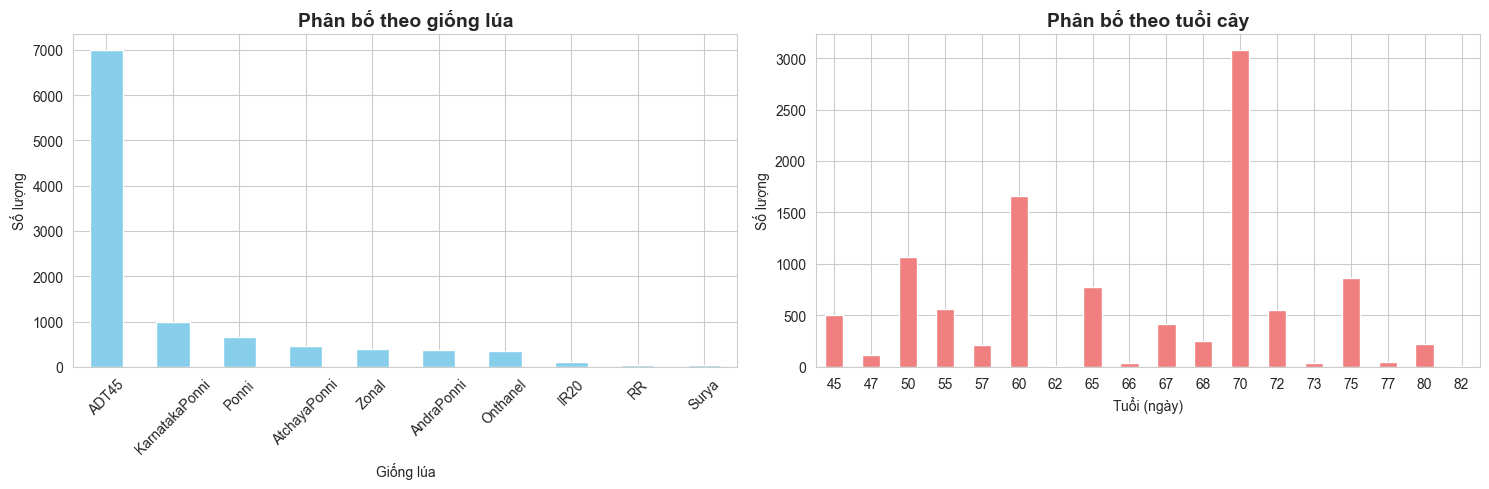

In [28]:
# Variety distribution
print(" Phân bố theo giống lúa:")
print(paddy_train_df['variety'].value_counts())

# Age distribution
print("\n Phân bố theo tuổi cây:")
print(paddy_train_df['age'].value_counts().sort_index())

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Variety
paddy_train_df['variety'].value_counts().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Phân bố theo giống lúa', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Giống lúa')
axes[0].set_ylabel('Số lượng')
axes[0].tick_params(axis='x', rotation=45)

# Age
paddy_train_df['age'].value_counts().sort_index().plot(kind='bar', ax=axes[1], color='lightcoral')
axes[1].set_title('Phân bố theo tuổi cây', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Tuổi (ngày)')
axes[1].set_ylabel('Số lượng')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

 Bảng chéo: Bệnh x Giống lúa
variety                   ADT45  AndraPonni  AtchayaPonni  IR20  \
label                                                             
bacterial_leaf_blight       406           0             0    10   
bacterial_leaf_streak       107           0             0     0   
bacterial_panicle_blight    260          14             0     0   
blast                       793         112            27    22   
brown_spot                  835           0             0     0   
dead_heart                  979          70             0    82   
downy_mildew                331           0            55     0   
hispa                       833         181           340     0   
normal                     1457           0             0     0   
tungro                      991           0            39     0   

variety                   KarnatakaPonni  Onthanel  Ponni  RR  Surya  Zonal  
label                                                                        
bacterial_

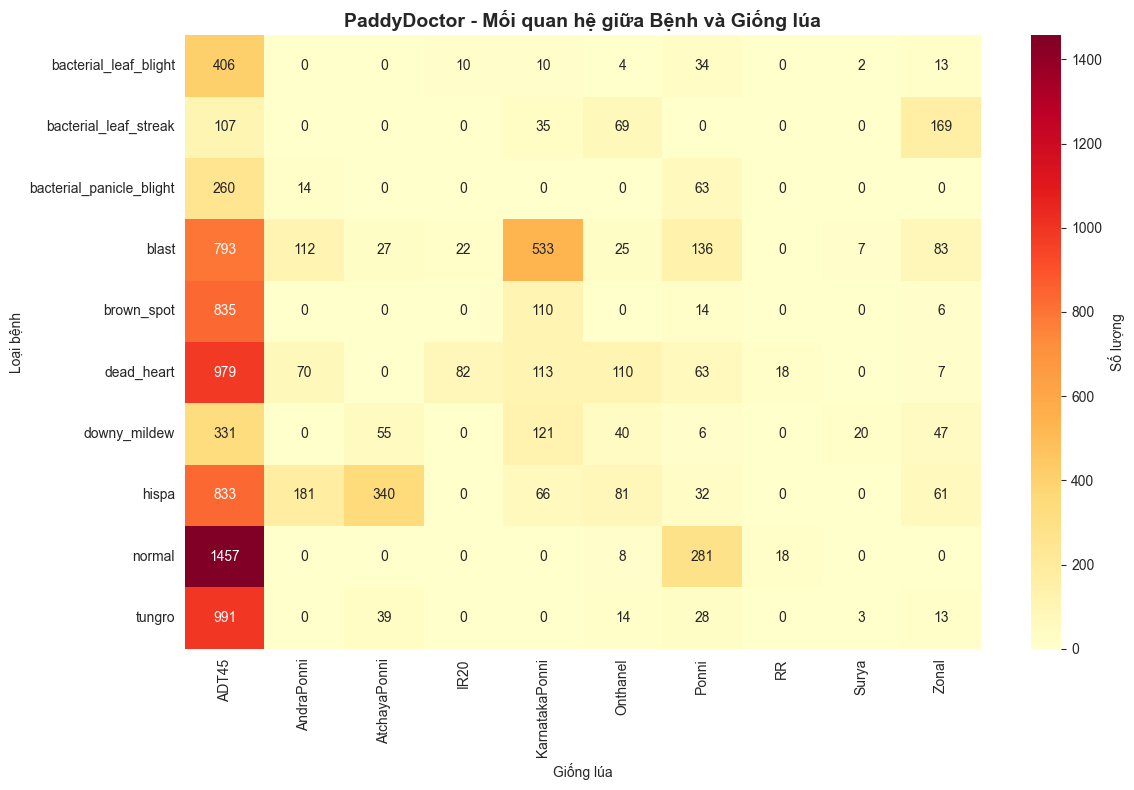

In [29]:
# Cross-tabulation: Disease vs Variety
disease_variety = pd.crosstab(paddy_train_df['label'], paddy_train_df['variety'])

print(" Bảng chéo: Bệnh x Giống lúa")
print(disease_variety)

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(disease_variety, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Số lượng'})
plt.title('PaddyDoctor - Mối quan hệ giữa Bệnh và Giống lúa', fontsize=14, fontweight='bold')
plt.xlabel('Giống lúa')
plt.ylabel('Loại bệnh')
plt.tight_layout()
plt.show()

## 2.4. Phân tích hình ảnh PaddyDoctor

In [30]:
# Get image dimensions
def get_image_dimensions(image_path):
    try:
        with Image.open(image_path) as img:
            return img.size
    except:
        return None

# Sample images from each disease
sample_images = []
for disease in disease_counts.index[:5]:  # First 5 diseases
    img_name = paddy_train_df[paddy_train_df['label'] == disease].iloc[0]['image_id']
    img_path = PADDY_DOCTOR_PATH / 'train_images' / disease / img_name
    if img_path.exists():
        dims = get_image_dimensions(img_path)
        sample_images.append({'disease': disease, 'path': img_path, 'dimensions': dims})

print(f" Kích thước hình ảnh mẫu:")
for img_info in sample_images:
    print(f"- {img_info['disease']}: {img_info['dimensions']}")

 Kích thước hình ảnh mẫu:
- normal: (480, 640)
- blast: (480, 640)
- hispa: (480, 640)
- dead_heart: (480, 640)
- tungro: (480, 640)


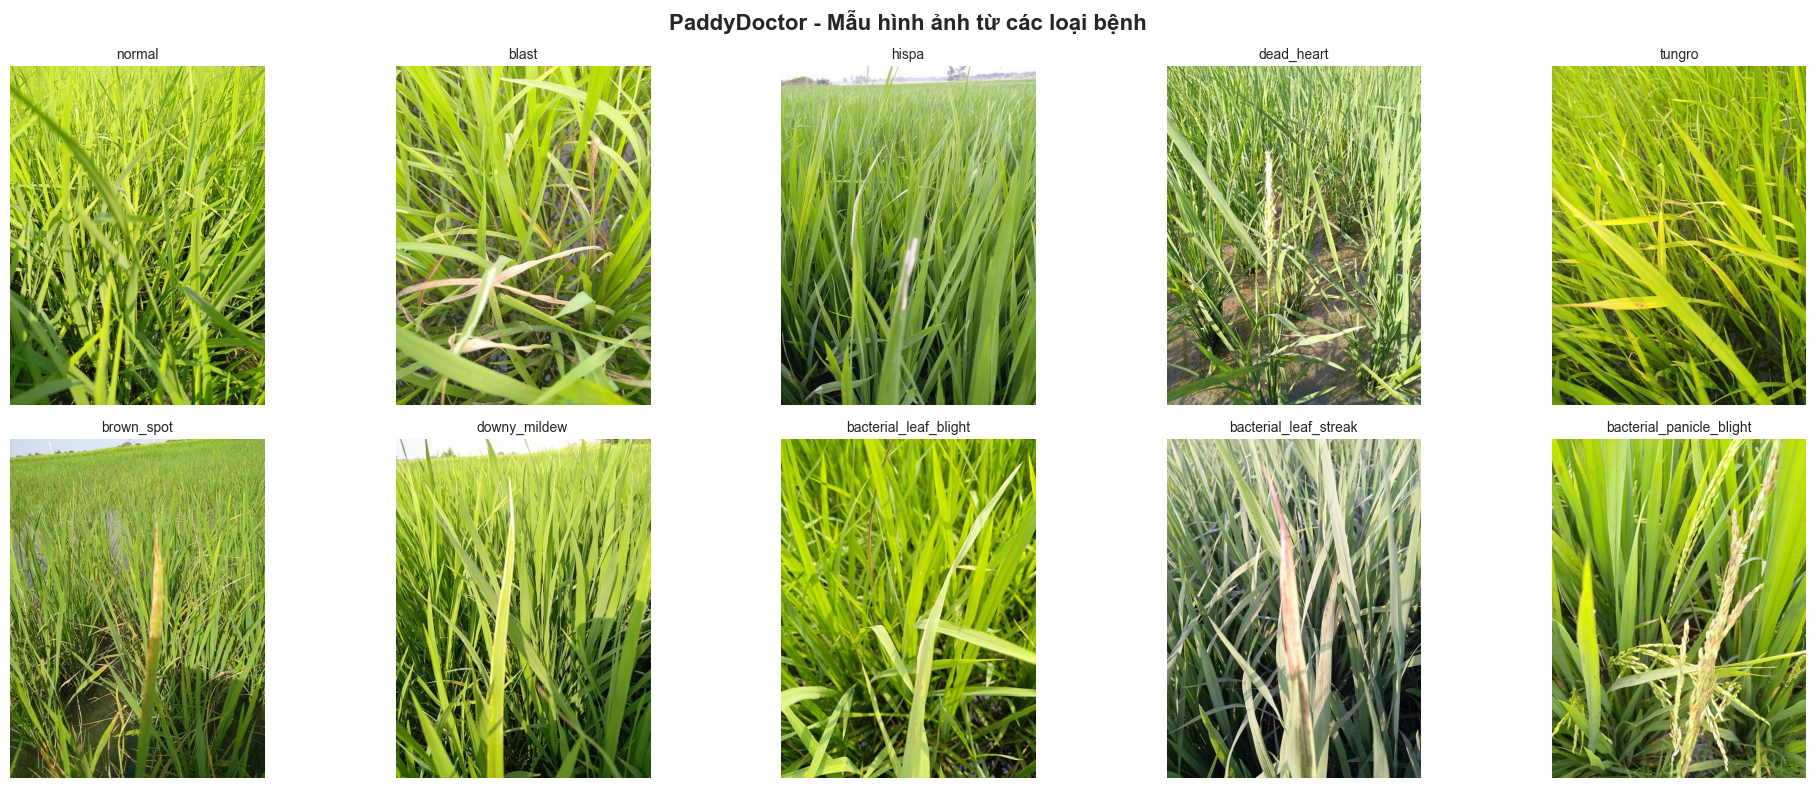

In [31]:
# Display sample images
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle('PaddyDoctor - Mẫu hình ảnh từ các loại bệnh', fontsize=16, fontweight='bold')

for idx, disease in enumerate(disease_counts.index[:10]):
    row = idx // 5
    col = idx % 5
    
    img_name = paddy_train_df[paddy_train_df['label'] == disease].iloc[0]['image_id']
    img_path = PADDY_DOCTOR_PATH / 'train_images' / disease / img_name
    
    if img_path.exists():
        img = Image.open(img_path)
        axes[row, col].imshow(img)
        axes[row, col].set_title(disease, fontsize=10)
        axes[row, col].axis('off')
    else:
        axes[row, col].text(0.5, 0.5, 'Image not found', ha='center', va='center')
        axes[row, col].axis('off')

plt.tight_layout()
plt.show()

---
# Dataset 2: PlantDoc - Object Detection Dataset

Dataset này dùng cho bài toán phát hiện đối tượng (object detection) với bounding boxes.

## 3.1. Load và khảo sát dữ liệu PlantDoc

In [32]:
# Load training labels
plantdoc_train_df = pd.read_csv(PLANT_DOC_PATH / 'train_labels.csv')
plantdoc_test_df = pd.read_csv(PLANT_DOC_PATH / 'test_labels.csv')

print(" Thông tin dataset PlantDoc:")
print(f"- Train samples: {len(plantdoc_train_df)}")
print(f"- Test samples: {len(plantdoc_test_df)}")
print(f"- Train images: {plantdoc_train_df['filename'].nunique()}")
print(f"- Test images: {plantdoc_test_df['filename'].nunique()}")

print(f"\n Xem 5 dòng đầu (Train):")
plantdoc_train_df.head(10)

 Thông tin dataset PlantDoc:
- Train samples: 8469
- Test samples: 452
- Train images: 2345
- Test images: 236

 Xem 5 dòng đầu (Train):


filename  width  height        class  xmin  \
0       cherry-tree-leaves-and-fruits.jpg    350     300  Cherry leaf   198   
1       cherry-tree-leaves-and-fruits.jpg    350     300  Cherry leaf     3   
2       cherry-tree-leaves-and-fruits.jpg    350     300  Cherry leaf    30   
3       cherry-tree-leaves-and-fruits.jpg    350     300  Cherry leaf   226   
4  peach-and-leaf-stock-image-2809275.jpg   1300    1099   Peach leaf   237   
5  peach-and-leaf-stock-image-2809275.jpg   1300    1099   Peach leaf   105   
6  peach-and-leaf-stock-image-2809275.jpg   1300    1099   Peach leaf   344   
7  peach-and-leaf-stock-image-2809275.jpg   1300    1099   Peach leaf   724   
8                    foodjuly2011+026.jpg   1011     804   Peach leaf    44   
9                    foodjuly2011+026.jpg   1011     804   Peach leaf    77   

   ymin  xmax  ymax  
0    77   299   252  
1   114   148   235  
2   184   189   297  
3     4   346    83  
4   479   527   810  
5   520   585   911  
6   106   651   462  
7   106   903   802  
8   217   747   589  
9   137   400   804

In [33]:
# Basic statistics
print(" Thống kê cơ bản:")
print(plantdoc_train_df.describe())
print("\n Giá trị null:")
print(plantdoc_train_df.isnull().sum())

 Thống kê cơ bản:
             width       height         xmin         ymin         xmax  \
count  8469.000000  8469.000000  8469.000000  8469.000000  8469.000000   
mean   1165.202621   980.830913   416.708466   322.233440   745.428622   
std     905.217709   748.340437   488.540712   383.240837   660.676327   
min       0.000000     0.000000     1.000000     1.000000    37.000000   
25%     576.000000   470.000000   100.000000    68.000000   326.000000   
50%     953.000000   750.000000   272.000000   206.000000   550.000000   
75%    1368.000000  1200.000000   550.000000   428.000000   916.000000   
max    6000.000000  6000.000000  4574.000000  3342.000000  5466.000000   

              ymax  
count  8469.000000  
mean    646.949699  
std     567.107716  
min      17.000000  
25%     288.000000  
50%     467.000000  
75%     791.000000  
max    4512.000000  

 Giá trị null:
filename    0
width       0
height      0
class       0
xmin        0
ymin        0
xmax        0
ymax        

## 3.2. Phân bố các lớp trong PlantDoc

In [34]:
# Class distribution
train_class_counts = plantdoc_train_df['class'].value_counts()
test_class_counts = plantdoc_test_df['class'].value_counts()

print(" Phân bố các lớp (Train):")
print(train_class_counts)

# Visualize
fig = go.Figure()
fig.add_trace(go.Bar(name='Train', x=train_class_counts.index, y=train_class_counts.values,
                     marker_color='lightblue'))
fig.add_trace(go.Bar(name='Test', x=test_class_counts.index, y=test_class_counts.values,
                     marker_color='lightcoral'))

fig.update_layout(barmode='group', 
                  title='PlantDoc - Phân bố các lớp (Train vs Test)',
                  xaxis_title='Lớp',
                  yaxis_title='Số lượng bounding boxes',
                  height=500)
fig.update_xaxes(tickangle=45)
fig.show()

 Phân bố các lớp (Train):
class
Blueberry leaf                          827
Tomato leaf yellow virus                787
Peach leaf                              610
Raspberry leaf                          539
Strawberry leaf                         462
Tomato Septoria leaf spot               412
Tomato leaf                             369
Corn leaf blight                        360
Potato leaf early blight                316
Bell_pepper leaf                        312
Tomato mold leaf                        277
Tomato leaf bacterial spot              266
Squash Powdery mildew leaf              251
Bell_pepper leaf spot                   249
Soyabean leaf                           246
Potato leaf late blight                 240
Apple leaf                              237
Tomato leaf mosaic virus                225
Cherry leaf                             221
Tomato leaf late blight                 207
grape leaf                              205
Tomato Early blight leaf                195


## 3.3. Phân tích Bounding Boxes

In [35]:
# Calculate bbox dimensions
plantdoc_train_df['bbox_width'] = plantdoc_train_df['xmax'] - plantdoc_train_df['xmin']
plantdoc_train_df['bbox_height'] = plantdoc_train_df['ymax'] - plantdoc_train_df['ymin']
plantdoc_train_df['bbox_area'] = plantdoc_train_df['bbox_width'] * plantdoc_train_df['bbox_height']
plantdoc_train_df['bbox_aspect_ratio'] = plantdoc_train_df['bbox_width'] / plantdoc_train_df['bbox_height']

print(" Thống kê Bounding Boxes:")
print(plantdoc_train_df[['bbox_width', 'bbox_height', 'bbox_area', 'bbox_aspect_ratio']].describe())

 Thống kê Bounding Boxes:
        bbox_width  bbox_height     bbox_area  bbox_aspect_ratio
count  8469.000000  8469.000000  8.469000e+03        8469.000000
mean    328.720156   324.716259  2.178284e+05           1.118099
std     382.969384   353.931102  7.342888e+05           0.645950
min      10.000000     2.000000  1.100000e+02           0.175476
25%     116.000000   119.000000  1.439100e+04           0.701389
50%     212.000000   218.000000  4.676500e+04           0.992278
75%     396.000000   387.000000  1.457470e+05           1.407583
max    5050.000000  4271.000000  1.593275e+07          27.500000


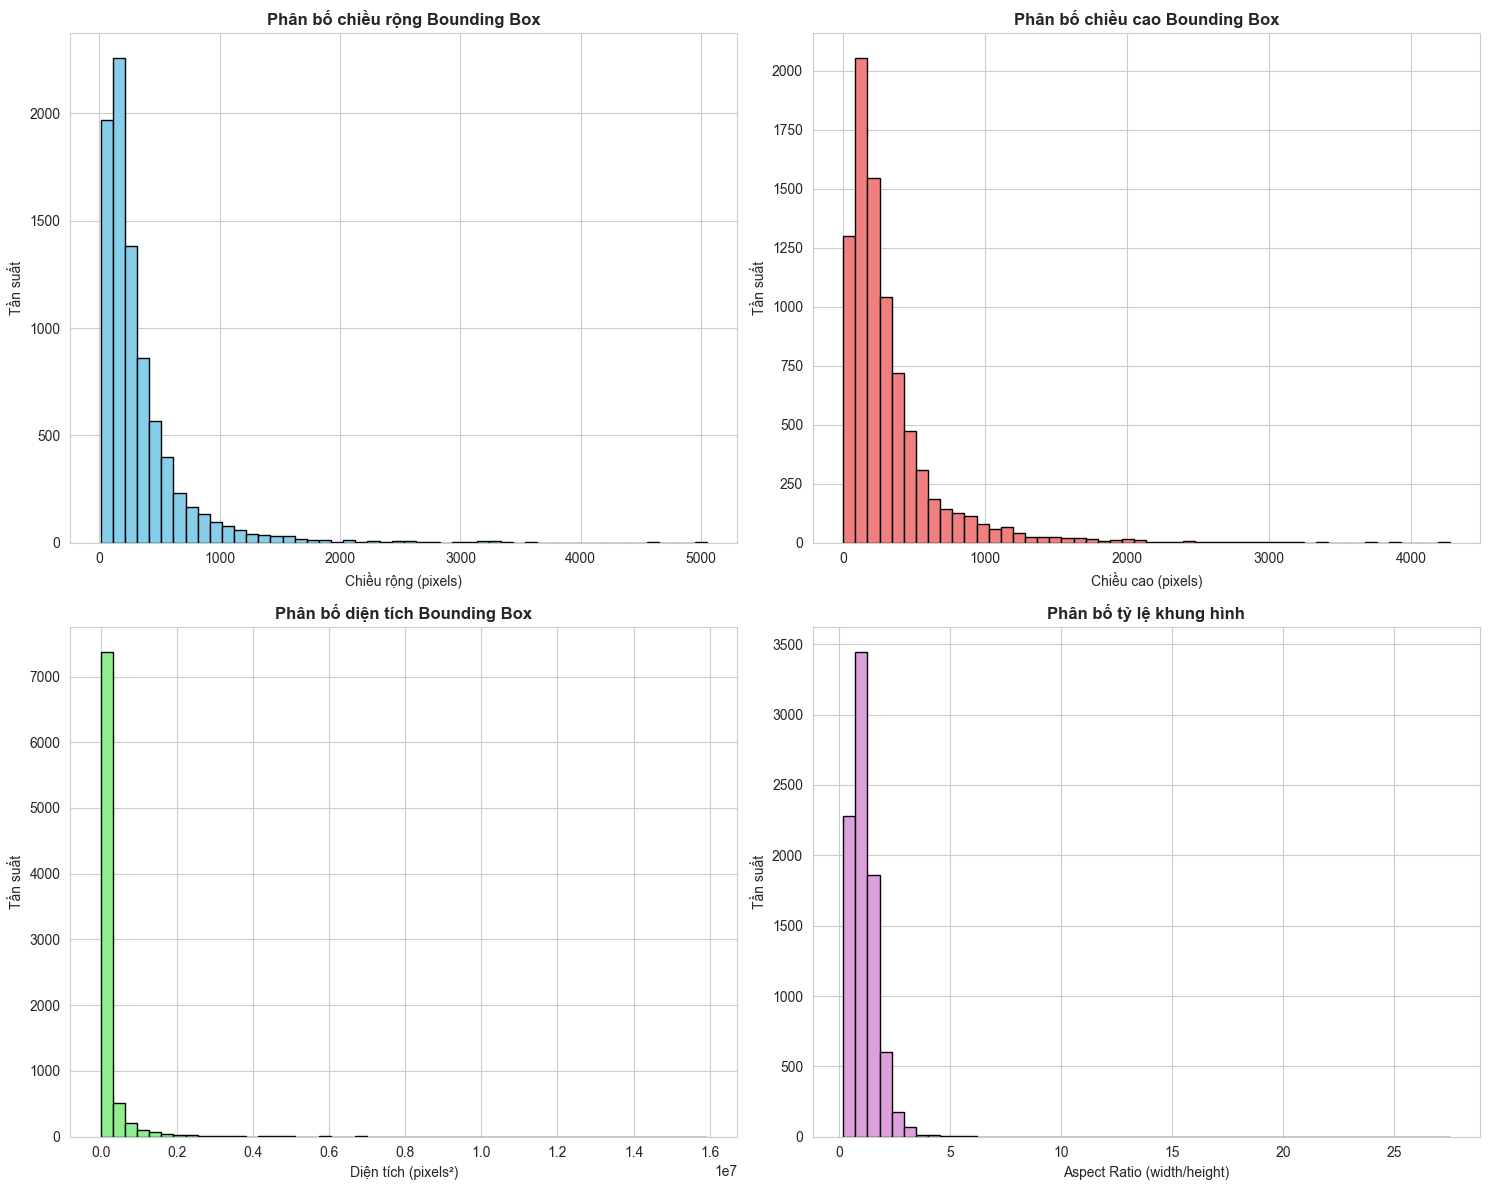

In [36]:
# Visualize bbox statistics
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Width distribution
axes[0, 0].hist(plantdoc_train_df['bbox_width'], bins=50, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Phân bố chiều rộng Bounding Box', fontweight='bold')
axes[0, 0].set_xlabel('Chiều rộng (pixels)')
axes[0, 0].set_ylabel('Tần suất')

# Height distribution
axes[0, 1].hist(plantdoc_train_df['bbox_height'], bins=50, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Phân bố chiều cao Bounding Box', fontweight='bold')
axes[0, 1].set_xlabel('Chiều cao (pixels)')
axes[0, 1].set_ylabel('Tần suất')

# Area distribution
axes[1, 0].hist(plantdoc_train_df['bbox_area'], bins=50, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Phân bố diện tích Bounding Box', fontweight='bold')
axes[1, 0].set_xlabel('Diện tích (pixels²)')
axes[1, 0].set_ylabel('Tần suất')

# Aspect ratio distribution
axes[1, 1].hist(plantdoc_train_df['bbox_aspect_ratio'], bins=50, color='plum', edgecolor='black')
axes[1, 1].set_title('Phân bố tỷ lệ khung hình', fontweight='bold')
axes[1, 1].set_xlabel('Aspect Ratio (width/height)')
axes[1, 1].set_ylabel('Tần suất')

plt.tight_layout()
plt.show()

 Số lượng objects trên mỗi ảnh:
count    2345.000000
mean        3.611514
std         4.057242
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max        42.000000
Name: num_objects, dtype: float64


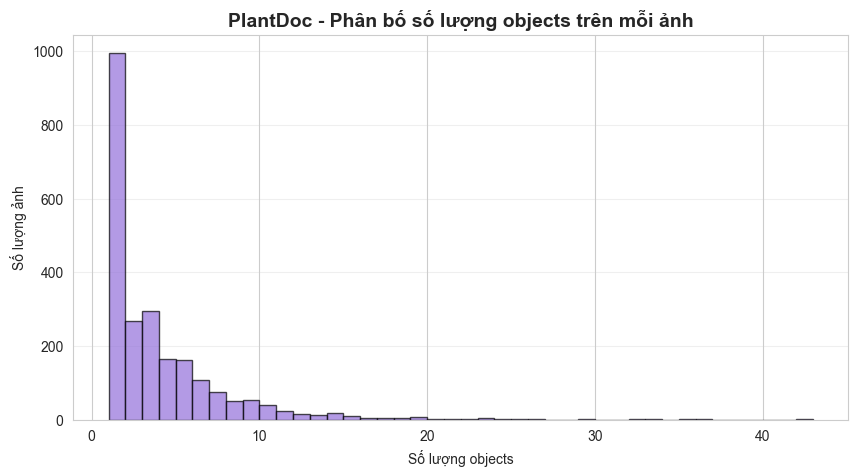

In [37]:
# Number of objects per image
objects_per_image = plantdoc_train_df.groupby('filename').size().reset_index(name='num_objects')

print(" Số lượng objects trên mỗi ảnh:")
print(objects_per_image['num_objects'].describe())

plt.figure(figsize=(10, 5))
plt.hist(objects_per_image['num_objects'], bins=range(1, objects_per_image['num_objects'].max()+2), 
         color='mediumpurple', edgecolor='black', alpha=0.7)
plt.title('PlantDoc - Phân bố số lượng objects trên mỗi ảnh', fontsize=14, fontweight='bold')
plt.xlabel('Số lượng objects')
plt.ylabel('Số lượng ảnh')
plt.grid(axis='y', alpha=0.3)
plt.show()

---
# Dataset 3: PlantVillage - Multi-class Plant Disease

Dataset lớn với nhiều loại cây và bệnh khác nhau.

## 4.1. Load và khảo sát cấu trúc PlantVillage

In [38]:
# Get all class folders
plantvillage_classes = [d.name for d in PLANT_VILLAGE_PATH.iterdir() if d.is_dir()]
plantvillage_classes.sort()

print(f" Thông tin dataset PlantVillage:")
print(f"- Tổng số lớp: {len(plantvillage_classes)}")
print(f"\n Các lớp:")
for i, cls in enumerate(plantvillage_classes, 1):
    print(f"{i}. {cls}")

 Thông tin dataset PlantVillage:
- Tổng số lớp: 39

 Các lớp:
1. Apple___Apple_scab
2. Apple___Black_rot
3. Apple___Cedar_apple_rust
4. Apple___healthy
5. Blueberry___healthy
6. Cherry_(including_sour)___Powdery_mildew
7. Cherry_(including_sour)___healthy
8. Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
9. Corn_(maize)___Common_rust_
10. Corn_(maize)___Northern_Leaf_Blight
11. Corn_(maize)___healthy
12. Grape___Black_rot
13. Grape___Esca_(Black_Measles)
14. Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
15. Grape___healthy
16. Orange___Haunglongbing_(Citrus_greening)
17. Peach___Bacterial_spot
18. Peach___healthy
19. Pepper,_bell___Bacterial_spot
20. Pepper,_bell___healthy
21. Potato___Early_blight
22. Potato___Late_blight
23. Potato___healthy
24. Raspberry___healthy
25. Soybean___healthy
26. Squash___Powdery_mildew
27. Strawberry___Leaf_scorch
28. Strawberry___healthy
29. Tomato___Bacterial_spot
30. Tomato___Early_blight
31. Tomato___Late_blight
32. Tomato___Leaf_Mold
33. Tomato___Se

In [39]:
# Count images per class
plantvillage_data = []
for class_name in plantvillage_classes:
    class_path = PLANT_VILLAGE_PATH / class_name
    num_images = len(list(class_path.glob('*')))
    
    # Extract plant and disease
    parts = class_name.split('___')
    plant = parts[0] if len(parts) > 0 else 'Unknown'
    disease = parts[1] if len(parts) > 1 else 'Unknown'
    
    plantvillage_data.append({
        'class_name': class_name,
        'plant': plant,
        'disease': disease,
        'num_images': num_images
    })

plantvillage_df = pd.DataFrame(plantvillage_data)
print("\n Tổng quan:")
print(f"- Tổng số ảnh: {plantvillage_df['num_images'].sum()}")
print(f"- Số loại cây: {plantvillage_df['plant'].nunique()}")
print(f"- Trung bình ảnh/lớp: {plantvillage_df['num_images'].mean():.2f}")

plantvillage_df.head(10)


 Tổng quan:
- Tổng số ảnh: 54305
- Số loại cây: 15
- Trung bình ảnh/lớp: 1392.44

- Tổng số ảnh: 54305
- Số loại cây: 15
- Trung bình ảnh/lớp: 1392.44


class_name                    plant  \
0                                 Apple___Apple_scab                    Apple   
1                                  Apple___Black_rot                    Apple   
2                           Apple___Cedar_apple_rust                    Apple   
3                                    Apple___healthy                    Apple   
4                                Blueberry___healthy                Blueberry   
5           Cherry_(including_sour)___Powdery_mildew  Cherry_(including_sour)   
6                  Cherry_(including_sour)___healthy  Cherry_(including_sour)   
7  Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...             Corn_(maize)   
8                        Corn_(maize)___Common_rust_             Corn_(maize)   
9                Corn_(maize)___Northern_Leaf_Blight             Corn_(maize)   

                               disease  num_images  
0                           Apple_scab         630  
1                            Black_rot         621  
2                     Cedar_apple_rust         275  
3                              healthy        1645  
4                              healthy        1502  
5                       Powdery_mildew        1052  
6                              healthy         853  
7  Cercospora_leaf_spot Gray_leaf_spot         513  
8                         Common_rust_        1192  
9                 Northern_Leaf_Blight         985

## 4.2. Phân bố các lớp trong PlantVillage

In [40]:
# Top and bottom classes
plantvillage_df_sorted = plantvillage_df.sort_values('num_images', ascending=False)

print(" Top 10 lớp có nhiều ảnh nhất:")
print(plantvillage_df_sorted.head(10)[['class_name', 'num_images']])

print("\n Top 10 lớp có ít ảnh nhất:")
print(plantvillage_df_sorted.tail(10)[['class_name', 'num_images']])

 Top 10 lớp có nhiều ảnh nhất:
                                       class_name  num_images
15       Orange___Haunglongbing_(Citrus_greening)        5507
35         Tomato___Tomato_Yellow_Leaf_Curl_Virus        5357
24                              Soybean___healthy        5089
16                         Peach___Bacterial_spot        2297
28                        Tomato___Bacterial_spot        2127
30                           Tomato___Late_blight        1909
25                        Squash___Powdery_mildew        1835
32                    Tomato___Septoria_leaf_spot        1771
33  Tomato___Spider_mites Two-spotted_spider_mite        1676
3                                 Apple___healthy        1645

 Top 10 lớp có ít ảnh nhất:
                                           class_name  num_images
1                                   Apple___Black_rot         621
7   Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...         513
27                               Strawberry___healthy       

In [41]:
# Visualize all classes
fig = px.bar(plantvillage_df_sorted, 
             x='class_name', 
             y='num_images',
             color='plant',
             title='PlantVillage - Số lượng ảnh theo lớp',
             labels={'num_images': 'Số lượng ảnh', 'class_name': 'Lớp'},
             height=600)
fig.update_xaxes(tickangle=90)
fig.show()

## 4.3. Phân tích theo loại cây

In [42]:
# Analysis by plant type
plant_summary = plantvillage_df.groupby('plant').agg({
    'num_images': 'sum',
    'disease': 'count'
}).reset_index()
plant_summary.columns = ['plant', 'total_images', 'num_diseases']
plant_summary = plant_summary.sort_values('total_images', ascending=False)

print(" Thống kê theo loại cây:")
print(plant_summary)

 Thống kê theo loại cây:
                            plant  total_images  num_diseases
13                         Tomato         18159            10
5                          Orange          5507             1
10                        Soybean          5089             1
4                           Grape          4062             4
3                    Corn_(maize)          3852             4
0                           Apple          3171             4
6                           Peach          2657             2
7                    Pepper,_bell          2473             2
8                          Potato          2152             3
2         Cherry_(including_sour)          1905             2
11                         Squash          1835             1
12                     Strawberry          1565             2
1                       Blueberry          1502             1
9                       Raspberry           371             1
14  x_Removed_from_Healthy_leaves            

In [43]:
# Visualize by plant
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Tổng số ảnh theo loại cây', 'Số lượng bệnh theo loại cây'),
                    specs=[[{'type':'bar'}, {'type':'bar'}]])

fig.add_trace(go.Bar(x=plant_summary['plant'], y=plant_summary['total_images'],
                     marker_color='lightgreen', showlegend=False), row=1, col=1)

fig.add_trace(go.Bar(x=plant_summary['plant'], y=plant_summary['num_diseases'],
                     marker_color='coral', showlegend=False), row=1, col=2)

fig.update_layout(height=500, title_text="PlantVillage - Phân tích theo loại cây")
fig.update_xaxes(tickangle=45)
fig.show()

## 4.4. Hiển thị mẫu hình ảnh từ PlantVillage

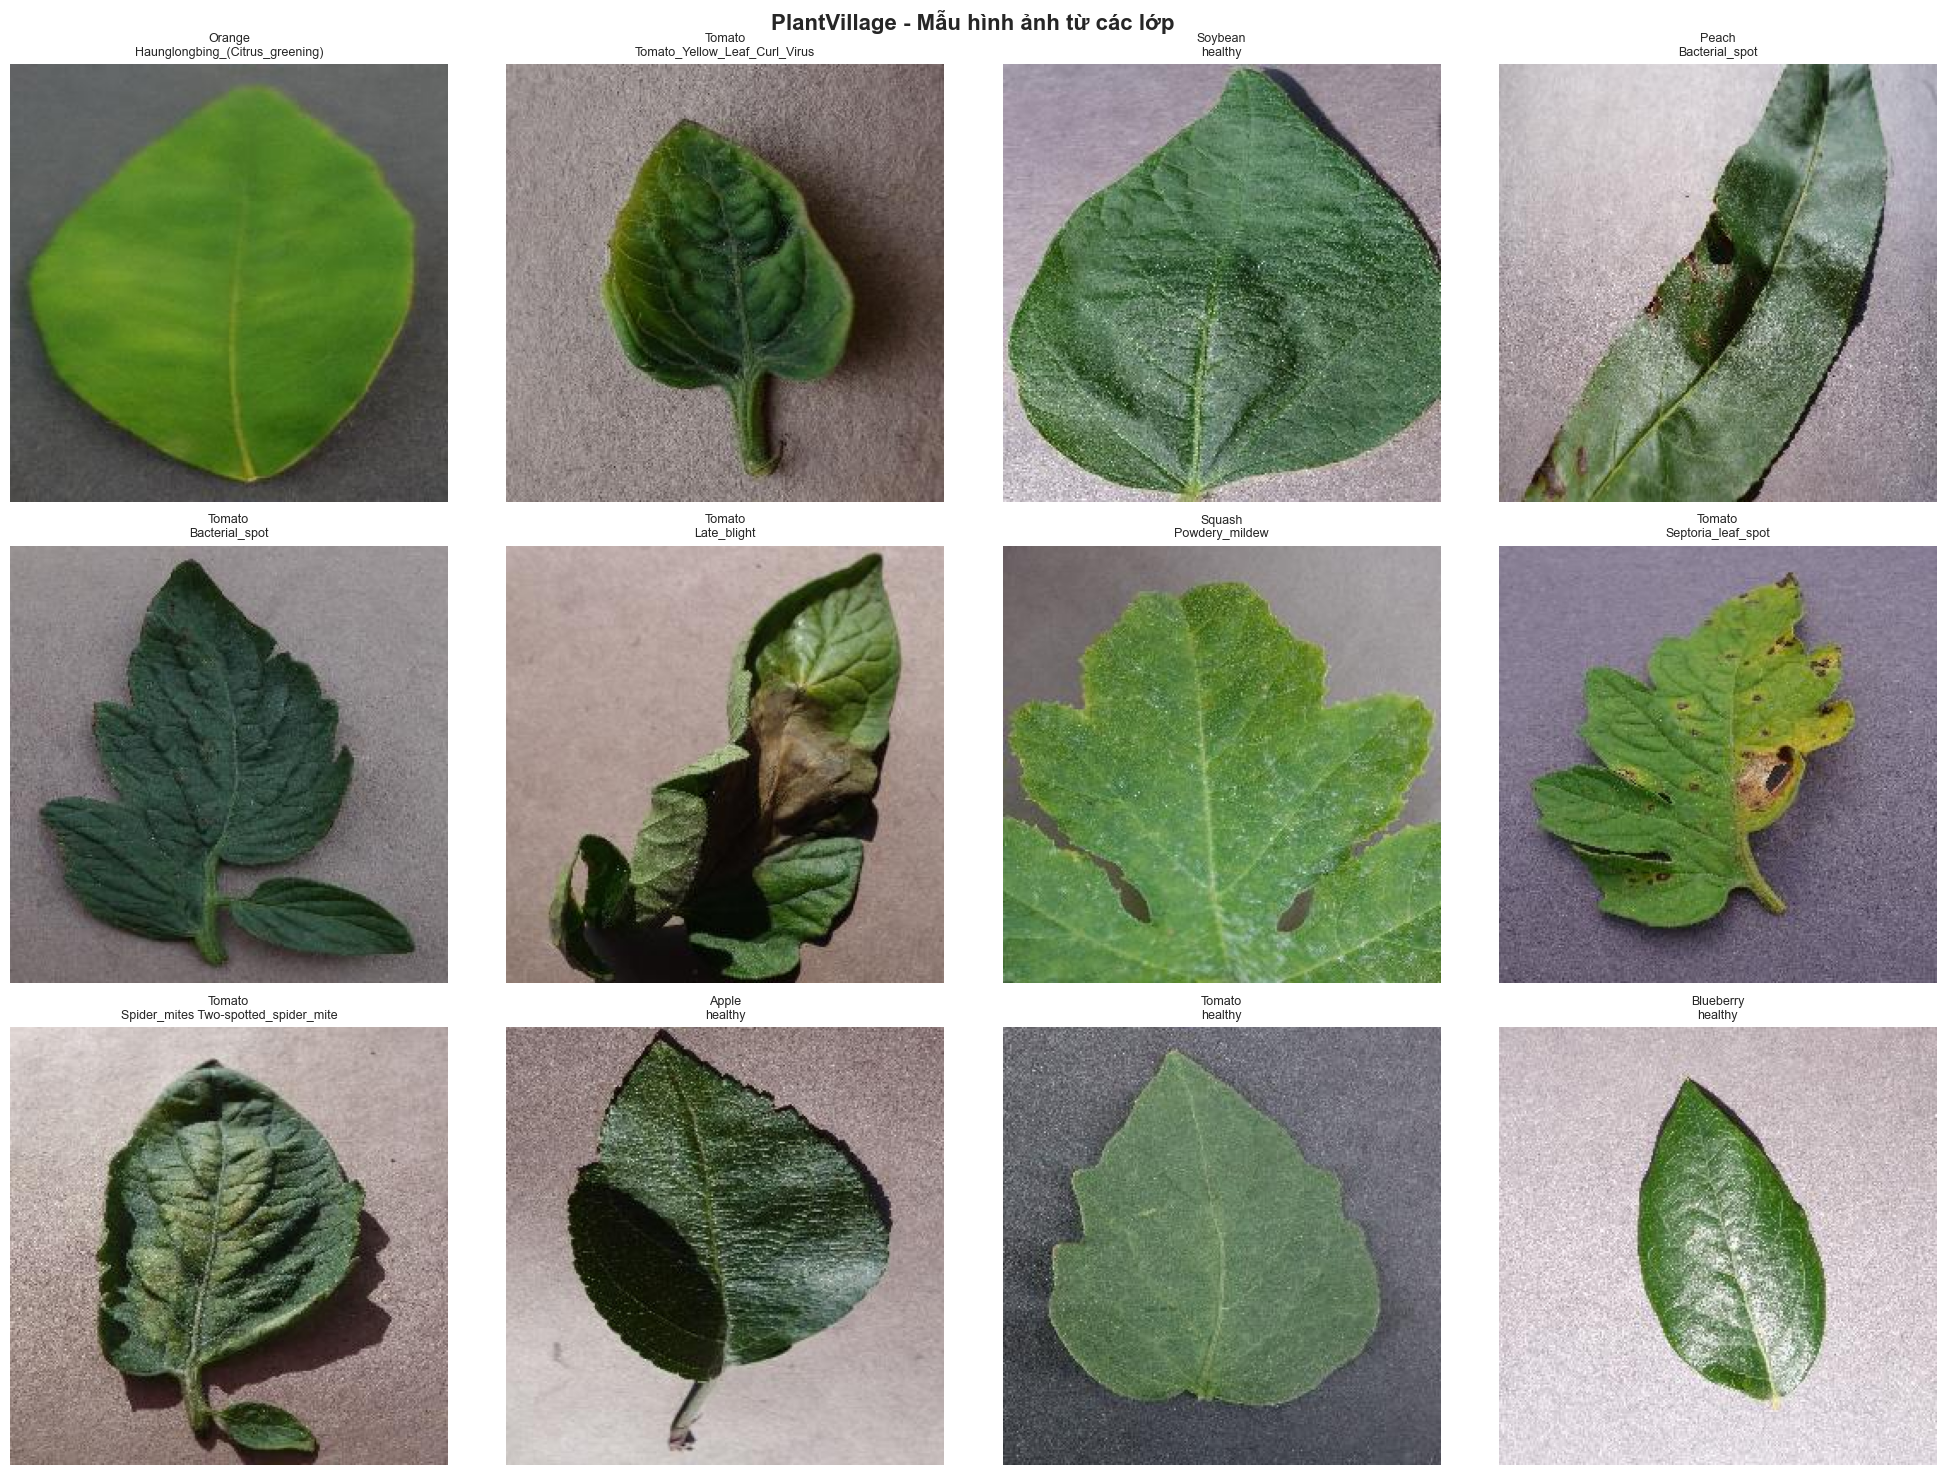

In [44]:
# Display sample images from top classes
top_classes = plantvillage_df_sorted.head(12)['class_name'].tolist()

fig, axes = plt.subplots(3, 4, figsize=(20, 15))
fig.suptitle('PlantVillage - Mẫu hình ảnh từ các lớp', fontsize=16, fontweight='bold')

for idx, class_name in enumerate(top_classes):
    row = idx // 4
    col = idx % 4
    
    class_path = PLANT_VILLAGE_PATH / class_name
    images = list(class_path.glob('*'))[:1]  # Get first image
    
    if images:
        img = Image.open(images[0])
        axes[row, col].imshow(img)
        axes[row, col].set_title(class_name.replace('___', '\n'), fontsize=9)
        axes[row, col].axis('off')
    else:
        axes[row, col].text(0.5, 0.5, 'No image', ha='center', va='center')
        axes[row, col].axis('off')

plt.tight_layout()
plt.show()

---
# Dataset 4: Plantwild - Extended Plant Disease Dataset

Dataset mở rộng với nhiều cấu trúc khác nhau.

## 5.1. Khảo sát Plantwild v1 (Original)

In [45]:
# Load classes
with open(PLANT_WILD_PATH / 'plantwild' / 'classes.txt', 'r') as f:
    plantwild_classes = [line.strip() for line in f.readlines()]

print(f" Thông tin dataset Plantwild v1:")
print(f"- Tổng số lớp: {len(plantwild_classes)}")
print(f"\n Các lớp đầu tiên:")
for i, cls in enumerate(plantwild_classes[:20], 1):
    print(f"{i}. {cls}")

 Thông tin dataset Plantwild v1:
- Tổng số lớp: 89

 Các lớp đầu tiên:
1. 0 apple black rot
2. 1 apple leaf
3. 2 apple mosaic virus
4. 3 apple rust
5. 4 apple scab
6. 5 banana leaf
7. 6 banana panama disease
8. 7 basil downy mildew
9. 8 basil leaf
10. 9 bean halo blight
11. 10 bean leaf
12. 11 bean mosaic virus
13. 12 bean rust
14. 13 bell pepper leaf
15. 14 bell pepper leaf spot
16. 15 blueberry leaf
17. 16 blueberry rust
18. 17 broccoli downy mildew
19. 18 broccoli leaf
20. 19 cabbage alternaria leaf spot


In [46]:
# Parse classes to extract plant and disease
plantwild_v1_data = []
for cls_line in plantwild_classes:
    parts = cls_line.split(maxsplit=1)
    class_id = parts[0] if len(parts) > 0 else ''
    class_name = parts[1] if len(parts) > 1 else ''
    
    # Try to parse plant and disease
    words = class_name.split()
    if len(words) >= 2:
        plant = words[0]
        disease = ' '.join(words[1:])
    else:
        plant = class_name
        disease = 'unknown'
    
    plantwild_v1_data.append({
        'class_id': class_id,
        'class_name': class_name,
        'plant': plant,
        'disease': disease
    })

plantwild_v1_df = pd.DataFrame(plantwild_v1_data)
print(f"\n Số loại cây: {plantwild_v1_df['plant'].nunique()}")
plantwild_v1_df.head(15)


 Số loại cây: 34


class_id             class_name   plant           disease
0         0        apple black rot   apple         black rot
1         1             apple leaf   apple              leaf
2         2     apple mosaic virus   apple      mosaic virus
3         3             apple rust   apple              rust
4         4             apple scab   apple              scab
5         5            banana leaf  banana              leaf
6         6  banana panama disease  banana    panama disease
7         7     basil downy mildew   basil      downy mildew
8         8             basil leaf   basil              leaf
9         9       bean halo blight    bean       halo blight
10       10              bean leaf    bean              leaf
11       11      bean mosaic virus    bean      mosaic virus
12       12              bean rust    bean              rust
13       13       bell pepper leaf    bell       pepper leaf
14       14  bell pepper leaf spot    bell  pepper leaf spot

 Phân bố theo loại cây:
plant
tomato         8
apple          5
corn           5
grape          4
cucumber       4
bean           4
ginger         3
garlic         3
cherry         3
celery         3
lettuce        3
potato         3
strawberry     3
rice           3
banana         2
blueberry      2
bell           2
basil          2
tobacco        2
eggplant       2
citrus         2
coffee         2
broccoli       2
cabbage        2
cauliflower    2
peach          2
maple          2
plum           2
squash         2
carrot         1
grapevine      1
raspberry      1
soybean        1
zucchini       1
Name: count, dtype: int64


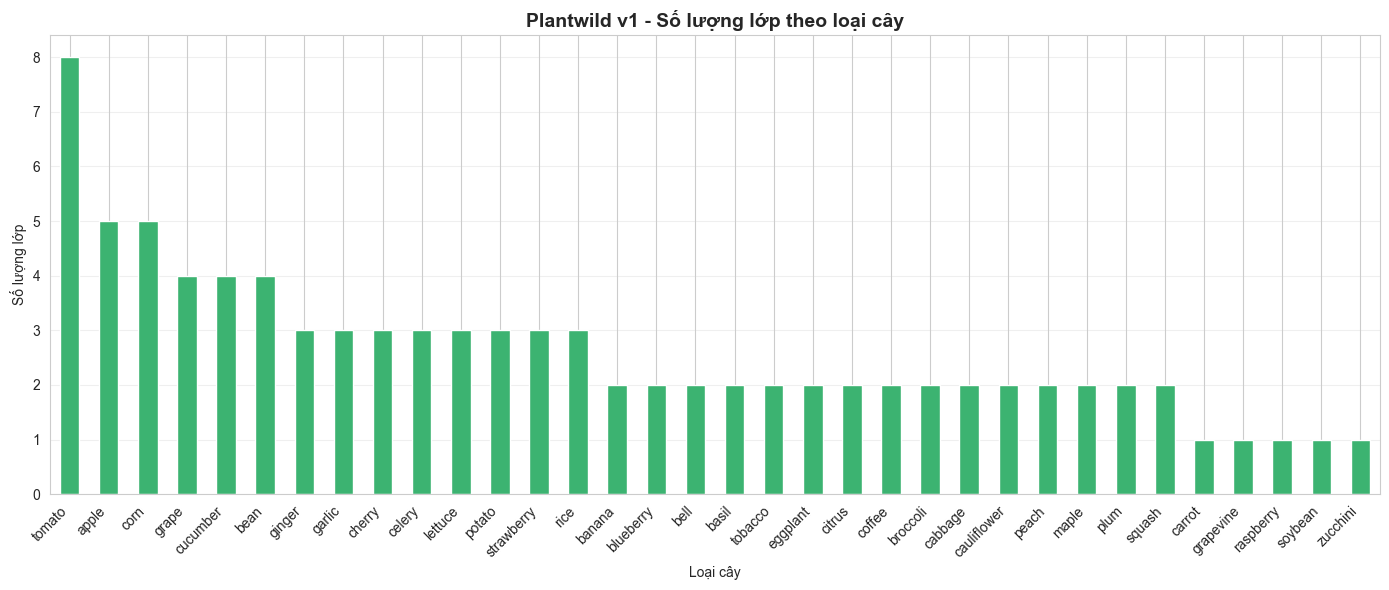

In [47]:
# Plant distribution
plant_counts_v1 = plantwild_v1_df['plant'].value_counts()

print(" Phân bố theo loại cây:")
print(plant_counts_v1)

plt.figure(figsize=(14, 6))
plant_counts_v1.plot(kind='bar', color='mediumseagreen')
plt.title('Plantwild v1 - Số lượng lớp theo loại cây', fontsize=14, fontweight='bold')
plt.xlabel('Loại cây')
plt.ylabel('Số lượng lớp')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 5.2. Khảo sát Plantwild v2

In [48]:
# Get all class folders in v2
plantwild_v2_path = PLANT_WILD_PATH / 'plantwild_v2'
if plantwild_v2_path.exists():
    plantwild_v2_classes = [d.name for d in plantwild_v2_path.iterdir() if d.is_dir()]
    plantwild_v2_classes.sort()
    
    print(f" Thông tin dataset Plantwild v2:")
    print(f"- Tổng số lớp: {len(plantwild_v2_classes)}")
    print(f"\n Các lớp:")
    for i, cls in enumerate(plantwild_v2_classes[:20], 1):
        print(f"{i}. {cls}")
else:
    print(" Không tìm thấy thư mục plantwild_v2")

 Thông tin dataset Plantwild v2:
- Tổng số lớp: 115

 Các lớp:
1. apple black rot
2. apple mosaic virus
3. apple rust
4. apple scab
5. banana anthracnose
6. banana black leaf streak
7. banana bunchy top
8. banana cigar end rot
9. banana cordana leaf spot
10. banana panama disease
11. basil downy mildew
12. bean halo blight
13. bean mosaic virus
14. bean rust
15. bell pepper bacterial spot
16. bell pepper blossom end rot
17. bell pepper frogeye leaf spot
18. bell pepper powdery mildew
19. blueberry anthracnose
20. blueberry botrytis blight


In [49]:
# Count images per class in v2
if plantwild_v2_path.exists():
    plantwild_v2_data = []
    for class_name in plantwild_v2_classes:
        class_path = plantwild_v2_path / class_name
        num_images = len(list(class_path.glob('*')))
        
        # Parse plant and disease
        words = class_name.split()
        plant = words[0] if words else 'unknown'
        disease = ' '.join(words[1:]) if len(words) > 1 else 'unknown'
        
        plantwild_v2_data.append({
            'class_name': class_name,
            'plant': plant,
            'disease': disease,
            'num_images': num_images
        })
    
    plantwild_v2_df = pd.DataFrame(plantwild_v2_data)
    plantwild_v2_df = plantwild_v2_df.sort_values('num_images', ascending=False)
    
    print("\n Tổng quan Plantwild v2:")
    print(f"- Tổng số ảnh: {plantwild_v2_df['num_images'].sum()}")
    print(f"- Số loại cây: {plantwild_v2_df['plant'].nunique()}")
    print(f"- Trung bình ảnh/lớp: {plantwild_v2_df['num_images'].mean():.2f}")
    
    plantwild_v2_df.head(10)


 Tổng quan Plantwild v2:
- Tổng số ảnh: 11488
- Số loại cây: 35
- Trung bình ảnh/lớp: 99.90


In [50]:
# Visualize v2 distribution
if plantwild_v2_path.exists() and len(plantwild_v2_df) > 0:
    fig = px.bar(plantwild_v2_df.head(30),
                 x='class_name',
                 y='num_images',
                 color='plant',
                 title='Plantwild v2 - Top 30 lớp có nhiều ảnh nhất',
                 labels={'num_images': 'Số lượng ảnh', 'class_name': 'Lớp'},
                 height=600)
    fig.update_xaxes(tickangle=90)
    fig.show()

## 5.3. Khảo sát Plantseg v2 (COCO format)

In [51]:
# Load COCO annotations
plantseg_path = PLANT_WILD_PATH / 'plantsegv2'
coco_file = plantseg_path / 'coco_annotations.json'

if coco_file.exists():
    with open(coco_file, 'r') as f:
        coco_data = json.load(f)
    
    print(" Thông tin Plantseg v2 (COCO format):")
    print(f"- Số lượng ảnh: {len(coco_data.get('images', []))}")
    print(f"- Số lượng annotations: {len(coco_data.get('annotations', []))}")
    print(f"- Số lượng categories: {len(coco_data.get('categories', []))}")
    
    # Categories
    if 'categories' in coco_data:
        print("\n Categories:")
        for cat in coco_data['categories'][:10]:
            print(f"  - {cat.get('id')}: {cat.get('name')}")
else:
    print(" Không tìm thấy file coco_annotations.json")

 Thông tin Plantseg v2 (COCO format):
- Số lượng ảnh: 11480
- Số lượng annotations: 81058
- Số lượng categories: 117

 Categories:
  - 1: apple black rot
  - 2: apple mosaic virus
  - 3: apple rust
  - 4: apple scab
  - 5: banana anthracnose
  - 6: banana black leaf streak
  - 7: banana bunchy top
  - 8: banana cigar end rot
  - 9: banana cordana leaf spot
  - 10: banana panama disease


 Phân bố annotations theo category:
  - citrus canker: 4683
  - apple scab: 2559
  - soybean frog eye leaf spot: 2538
  - cherry leaf spot: 2460
  - cucumber angular leaf spot: 2252
  - wheat stripe rust: 2219
  - tomato early blight: 2158
  - zucchini powdery mildew: 1902
  - tomato bacterial leaf spot: 1742
  - zucchini downy mildew: 1610
  - tomato septoria leaf spot: 1572
  - tomato yellow leaf curl virus: 1409
  - coffee leaf rust: 1381
  - bell pepper bacterial spot: 1311
  - maple tar spot: 1287


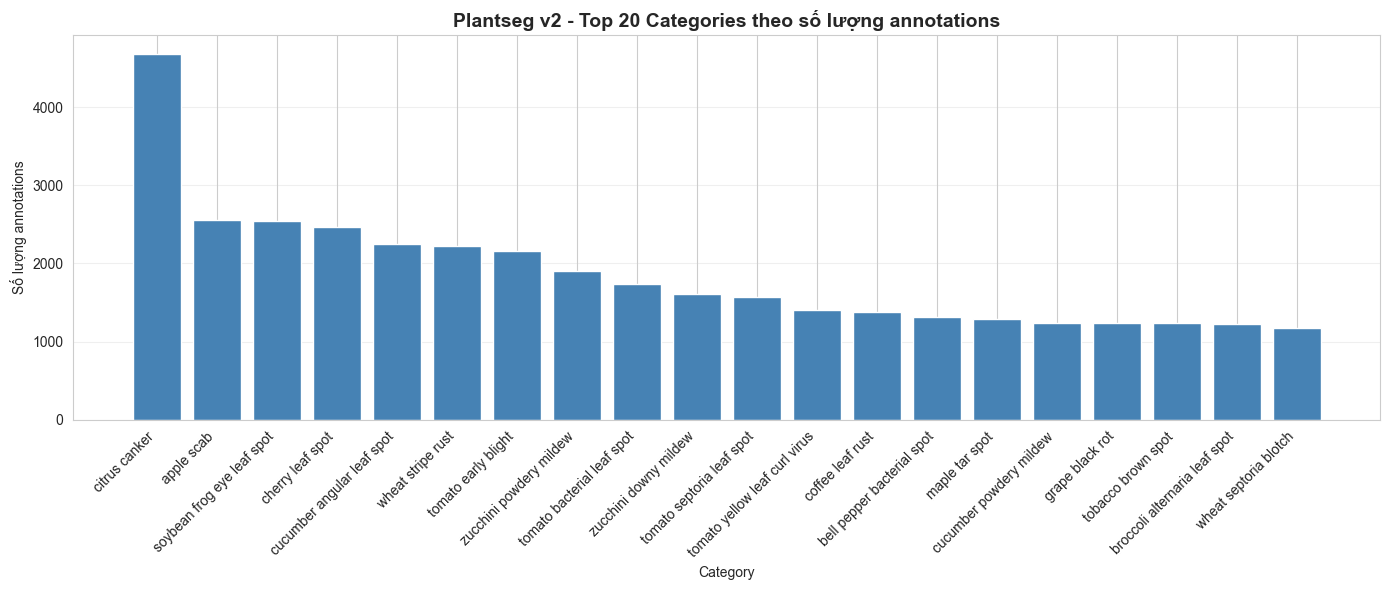

In [52]:
# Analyze annotations
if coco_file.exists():
    # Count annotations per category
    category_counts = {}
    for ann in coco_data.get('annotations', []):
        cat_id = ann.get('category_id')
        category_counts[cat_id] = category_counts.get(cat_id, 0) + 1
    
    # Map to category names
    cat_id_to_name = {cat['id']: cat['name'] for cat in coco_data.get('categories', [])}
    category_dist = [(cat_id_to_name.get(cat_id, f'Unknown_{cat_id}'), count) 
                     for cat_id, count in category_counts.items()]
    category_dist.sort(key=lambda x: x[1], reverse=True)
    
    print(" Phân bố annotations theo category:")
    for name, count in category_dist[:15]:
        print(f"  - {name}: {count}")
    
    # Visualize
    top_cats = category_dist[:20]
    names, counts = zip(*top_cats)
    
    plt.figure(figsize=(14, 6))
    plt.bar(names, counts, color='steelblue')
    plt.title('Plantseg v2 - Top 20 Categories theo số lượng annotations', fontsize=14, fontweight='bold')
    plt.xlabel('Category')
    plt.ylabel('Số lượng annotations')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

---
# 6. So sánh tổng quan các Datasets

In [53]:
# Create summary comparison
summary_data = {
    'Dataset': ['PaddyDoctor', 'PlantDoc', 'PlantVillage', 'Plantwild v2'],
    'Số lượng ảnh': [
        len(paddy_train_df),
        plantdoc_train_df['filename'].nunique() + plantdoc_test_df['filename'].nunique(),
        plantvillage_df['num_images'].sum(),
        plantwild_v2_df['num_images'].sum() if plantwild_v2_path.exists() else 0
    ],
    'Số lớp': [
        paddy_train_df['label'].nunique(),
        plantdoc_train_df['class'].nunique(),
        len(plantvillage_classes),
        len(plantwild_v2_classes) if plantwild_v2_path.exists() else 0
    ],
    'Loại': [
        'Classification',
        'Object Detection',
        'Classification',
        'Classification'
    ]
}

summary_df = pd.DataFrame(summary_data)

print(" TỔNG QUAN SO SÁNH CÁC DATASETS:")
print("="*70)
print(summary_df.to_string(index=False))
print("="*70)

 TỔNG QUAN SO SÁNH CÁC DATASETS:
     Dataset  Số lượng ảnh  Số lớp             Loại
 PaddyDoctor         10407      10   Classification
    PlantDoc          2581      29 Object Detection
PlantVillage         54305      39   Classification
Plantwild v2         11488     115   Classification


In [54]:
# Visualize comparison
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Số lượng ảnh', 'Số lớp'),
                    specs=[[{'type':'bar'}, {'type':'bar'}]])

# Number of images
fig.add_trace(go.Bar(x=summary_df['Dataset'], 
                     y=summary_df['Số lượng ảnh'],
                     marker_color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'],
                     showlegend=False), row=1, col=1)

# Number of classes
fig.add_trace(go.Bar(x=summary_df['Dataset'], 
                     y=summary_df['Số lớp'],
                     marker_color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'],
                     showlegend=False), row=1, col=2)

fig.update_layout(height=500, title_text="So sánh tổng quan các Datasets")
fig.update_yaxes(type='log', row=1, col=1)  # Log scale for better visualization
fig.show()